<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/alpha_ve_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analiz etmek istediğiniz coinleri seçin:
1. BTC
2. ETH
3. BNB
4. XRP
5. ADA
6. DOGE
7. SOL
8. DOT
9. AVAX
10. LTC
11. MATIC
12. UNI
13. LINK
14. ATOM
15. XLM
Coin numaralarını virgülle ayırarak girin (örneğin: 1,2,3): 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
                          date  BTC_alpha   ETH_alpha   BNB_alpha   XRP_alpha  \
361 2025-01-10 17:07:21.042303 -25.844660   69.526018  -42.734779   63.900298   
362 2025-01-11 17:07:21.042303 -89.586925  -33.593864 -250.014868 -146.424550   
363 2025-01-12 17:07:21.042303 -64.957071 -130.232200 -270.552425   70.662856   
364 2025-01-13 17:07:21.042303  42.013447   87.344465 -217.918640 -699.233727   
365 2025-01-14 17:07:21.042303 -29.788824   60.479579 -355.371689   25.109478   

      ADA_alpha  DOGE_alpha   SOL_alpha    DOT_alpha  AVAX_alpha  ...  \
361  -67.021113   41.208964   86.782850    30.909860  -93.051760  ...   
362 -972.811726   76.602700 -518.490529  -387.065080 -726.078275  ...   
363   86.308817  -25.427726  -16.697529 

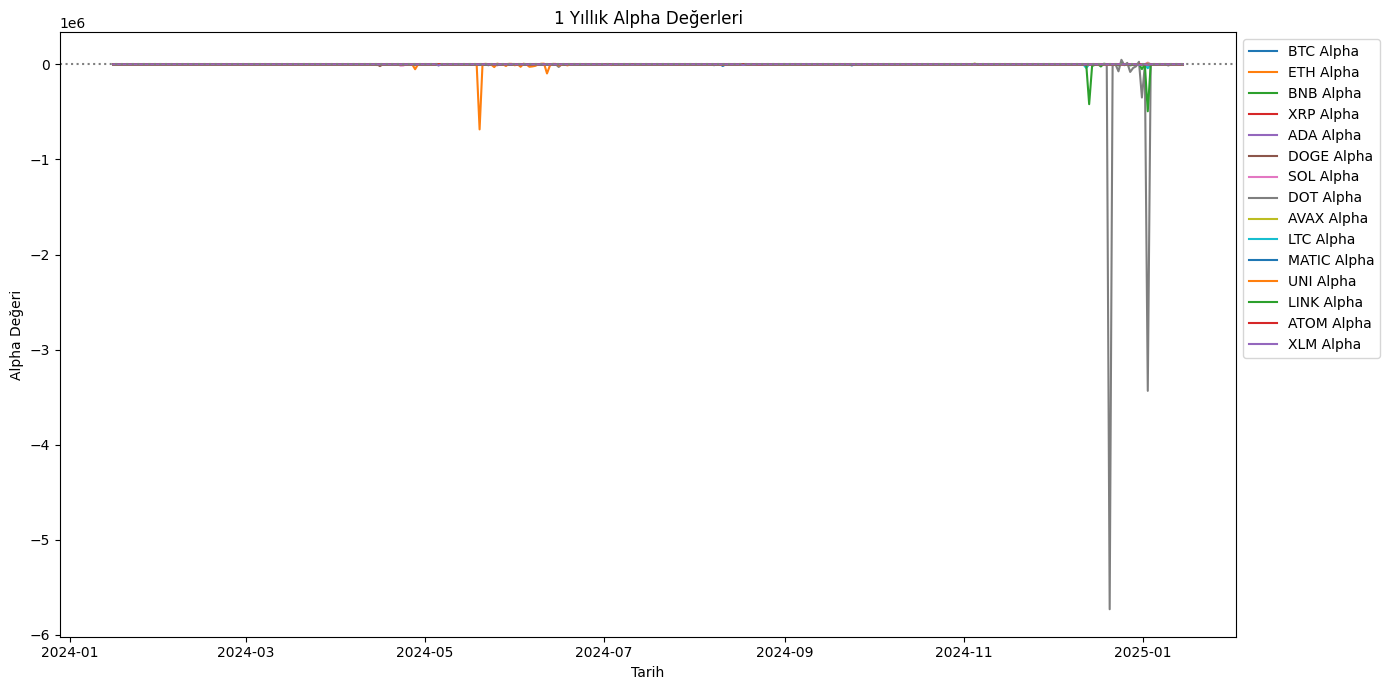

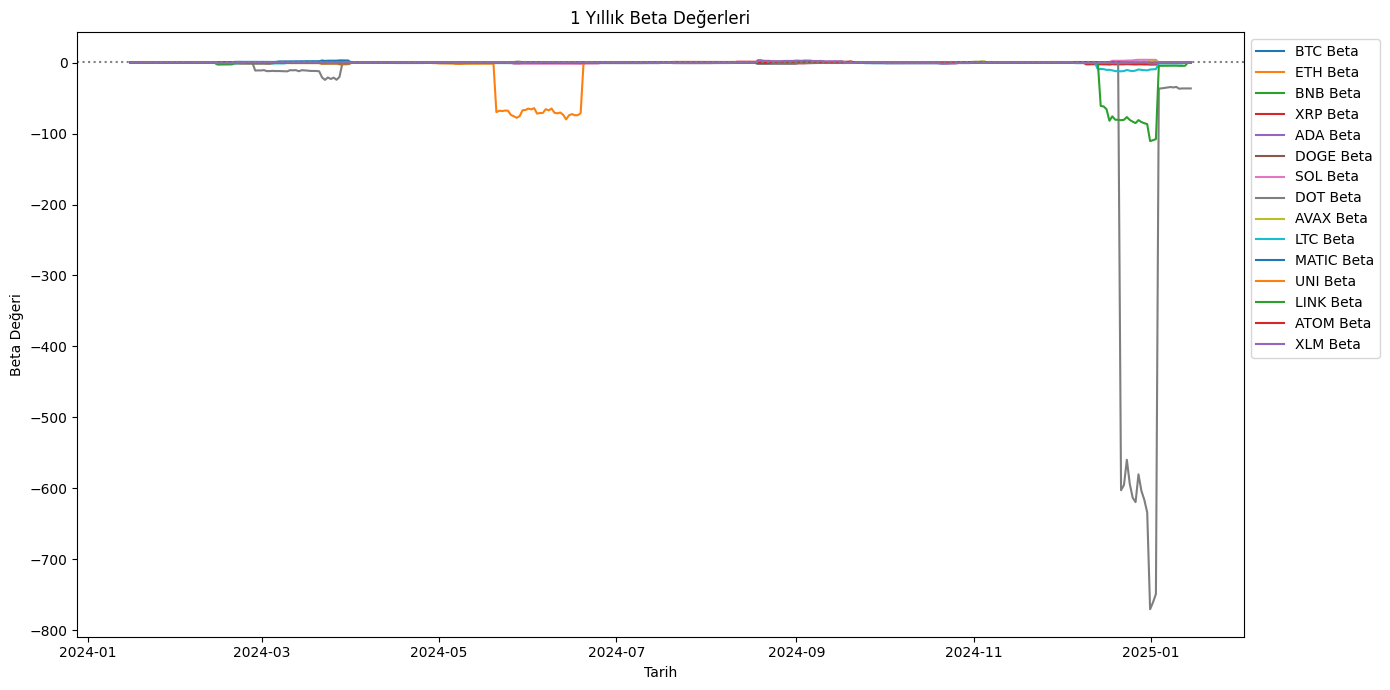

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 15 popüler coin listesi
coins = [
    "BTC", "ETH", "BNB", "XRP", "ADA", "DOGE", "SOL", "DOT", "AVAX", "LTC",
    "MATIC", "UNI", "LINK", "ATOM", "XLM"
]

# Kullanıcıdan seçim al
print("Analiz etmek istediğiniz coinleri seçin:")
for i, coin in enumerate(coins):
    print(f"{i + 1}. {coin}")

selected_indices = input("Coin numaralarını virgülle ayırarak girin (örneğin: 1,2,3): ")
selected_indices = [int(i) - 1 for i in selected_indices.split(",")]
selected_coins = [coins[i] for i in selected_indices]

# Şu andan geriye dönük 1 yıllık veri oluşturma
end_date = pd.Timestamp.now()  # Bugünün tarihi
start_date = end_date - pd.Timedelta(days=365)  # 1 yıl öncesi
dates = pd.date_range(start=start_date, end=end_date, freq='D')  # Günlük tarihler

# Veri çerçevesini oluştur
data = {'date': dates}
np.random.seed(42)  # Tekrarlanabilirlik için

# Her bir coin ve endeks için rastgele kapanış fiyatları oluştur
for coin in selected_coins:
    data[coin] = np.random.rand(len(dates)) * 100  # Coin kapanış fiyatları
data['Index'] = np.random.rand(len(dates)) * 100  # Endeks kapanış fiyatları

df = pd.DataFrame(data)

# Beta ve Alpha hesaplama fonksiyonu
def calculate_beta_alpha(df, coin, index_col='Index', length=30, alpha_period=90):
    # Getirileri hesapla
    df[f'{coin}_ret'] = df[coin].pct_change()
    df[f'{index_col}_ret'] = df[index_col].pct_change()

    # Standart sapmaları hesapla
    df[f'{coin}_secd'] = df[f'{coin}_ret'].rolling(window=length).std()
    df[f'{index_col}_mktd'] = df[f'{index_col}_ret'].rolling(window=length).std()

    # Beta hesapla
    df[f'{coin}_beta'] = (
        df[f'{coin}_ret'].rolling(window=length).corr(df[f'{index_col}_ret']) *
        df[f'{coin}_secd'] / df[f'{index_col}_mktd']
    )

    # Alpha hesapla
    df[f'{coin}_ret2'] = (df[coin] - df[coin].shift(alpha_period)) / df[coin]
    df[f'{index_col}_ret2'] = (df[index_col] - df[index_col].shift(alpha_period)) / df[index_col]
    df[f'{coin}_alpha'] = (df[f'{coin}_ret2'] - df[f'{index_col}_ret2'] * df[f'{coin}_beta']) * 100

    # NaN değerleri sıfırla
    df[f'{coin}_alpha'] = df[f'{coin}_alpha'].fillna(0)
    df[f'{coin}_beta'] = df[f'{coin}_beta'].fillna(0)

    return df

# Seçilen coinler için Beta ve Alpha hesapla
for coin in selected_coins:
    df = calculate_beta_alpha(df, coin)

# Sonuçları görüntüle (son 5 gün)
results = df[['date'] + [f'{coin}_alpha' for coin in selected_coins] + [f'{coin}_beta' for coin in selected_coins]]
print(results.tail())

# Sonuçları bir tablo halinde görüntüle
results_table = pd.DataFrame({
    'Coin': selected_coins,
    'Alpha': [df[f'{coin}_alpha'].iloc[-1] for coin in selected_coins],
    'Beta': [df[f'{coin}_beta'].iloc[-1] for coin in selected_coins]
})

print("\nAlpha ve Beta Değerleri:")
print(results_table)

# Görselleştirme (Alpha ve Beta değerleri)
plt.figure(figsize=(14, 7))
for coin in selected_coins:
    plt.plot(df['date'], df[f'{coin}_alpha'], label=f'{coin} Alpha')
plt.axhline(0, color='gray', linestyle='dotted')
plt.title('1 Yıllık Alpha Değerleri')
plt.xlabel('Tarih')
plt.ylabel('Alpha Değeri')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Grafiğin dışında legend
plt.tight_layout()  # Grafiklerin düzgün sığması için
plt.show()

plt.figure(figsize=(14, 7))
for coin in selected_coins:
    plt.plot(df['date'], df[f'{coin}_beta'], label=f'{coin} Beta')
plt.axhline(1.5, color='gray', linestyle='dotted')
plt.title('1 Yıllık Beta Değerleri')
plt.xlabel('Tarih')
plt.ylabel('Beta Değeri')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Grafiğin dışında legend
plt.tight_layout()  # Grafiklerin düzgün sığması için
plt.show()